# I -  Analisis de Datos


Modificando estilos para tener diagramas centrados.

In [16]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

Importando Librerias

In [84]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Librerias necesarias para manipulacion de datos

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

# Aprendizaje automatico.
import sklearn
from sklearn.model_selection import train_test_split

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

# Retina command that makes things look good
%config InlineBackend.figure_format = 'retina'

In [85]:
# Importando Datos
data = pd.read_csv('./data/train.csv')

In [86]:
# Verificando la importancion de datos
print (data.shape)

(891, 12)


We have:

- 891 rows
- 12 columns

Pandas allows you to have a sneak peak at your data.

In [87]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


La columna Survived es la variable objetivo: 1 indica Sobrevicio, 0 lo contrario.

Las otras variables describen a los pasajeros

- PassengerId: ID asignado
- Pclass: Clase del pasajero: primera, segunda, tercera
- Name: Nombre del Pasajero
- Sex: Sexo
- Age: Edad
- SibSp: número de hermanos y cónyuges que viajan con el pasajero
- Parch: número de padres y niños que viajan con el pasajero
- Ticket: Numero de Ticket
- Fare: Tarifa del Boleto
- Cabin: Numero de Cabina 
- Embarkation. Areas de embarque: S,C,Q

In [88]:
# Descripcion estadistica de variables numericas
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


La variable de conteo muestra que faltan 177 valores en la columna Edad.

Una solución es completar los valores nulos con la mediana de edad. También podríamos insertar con la edad media, pero la mediana es más robusta a valores atípicos.

In [89]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [90]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Visualizando la sobrevivencia basado en el genero.

In [91]:
data['Died'] = 1 - data['Survived']

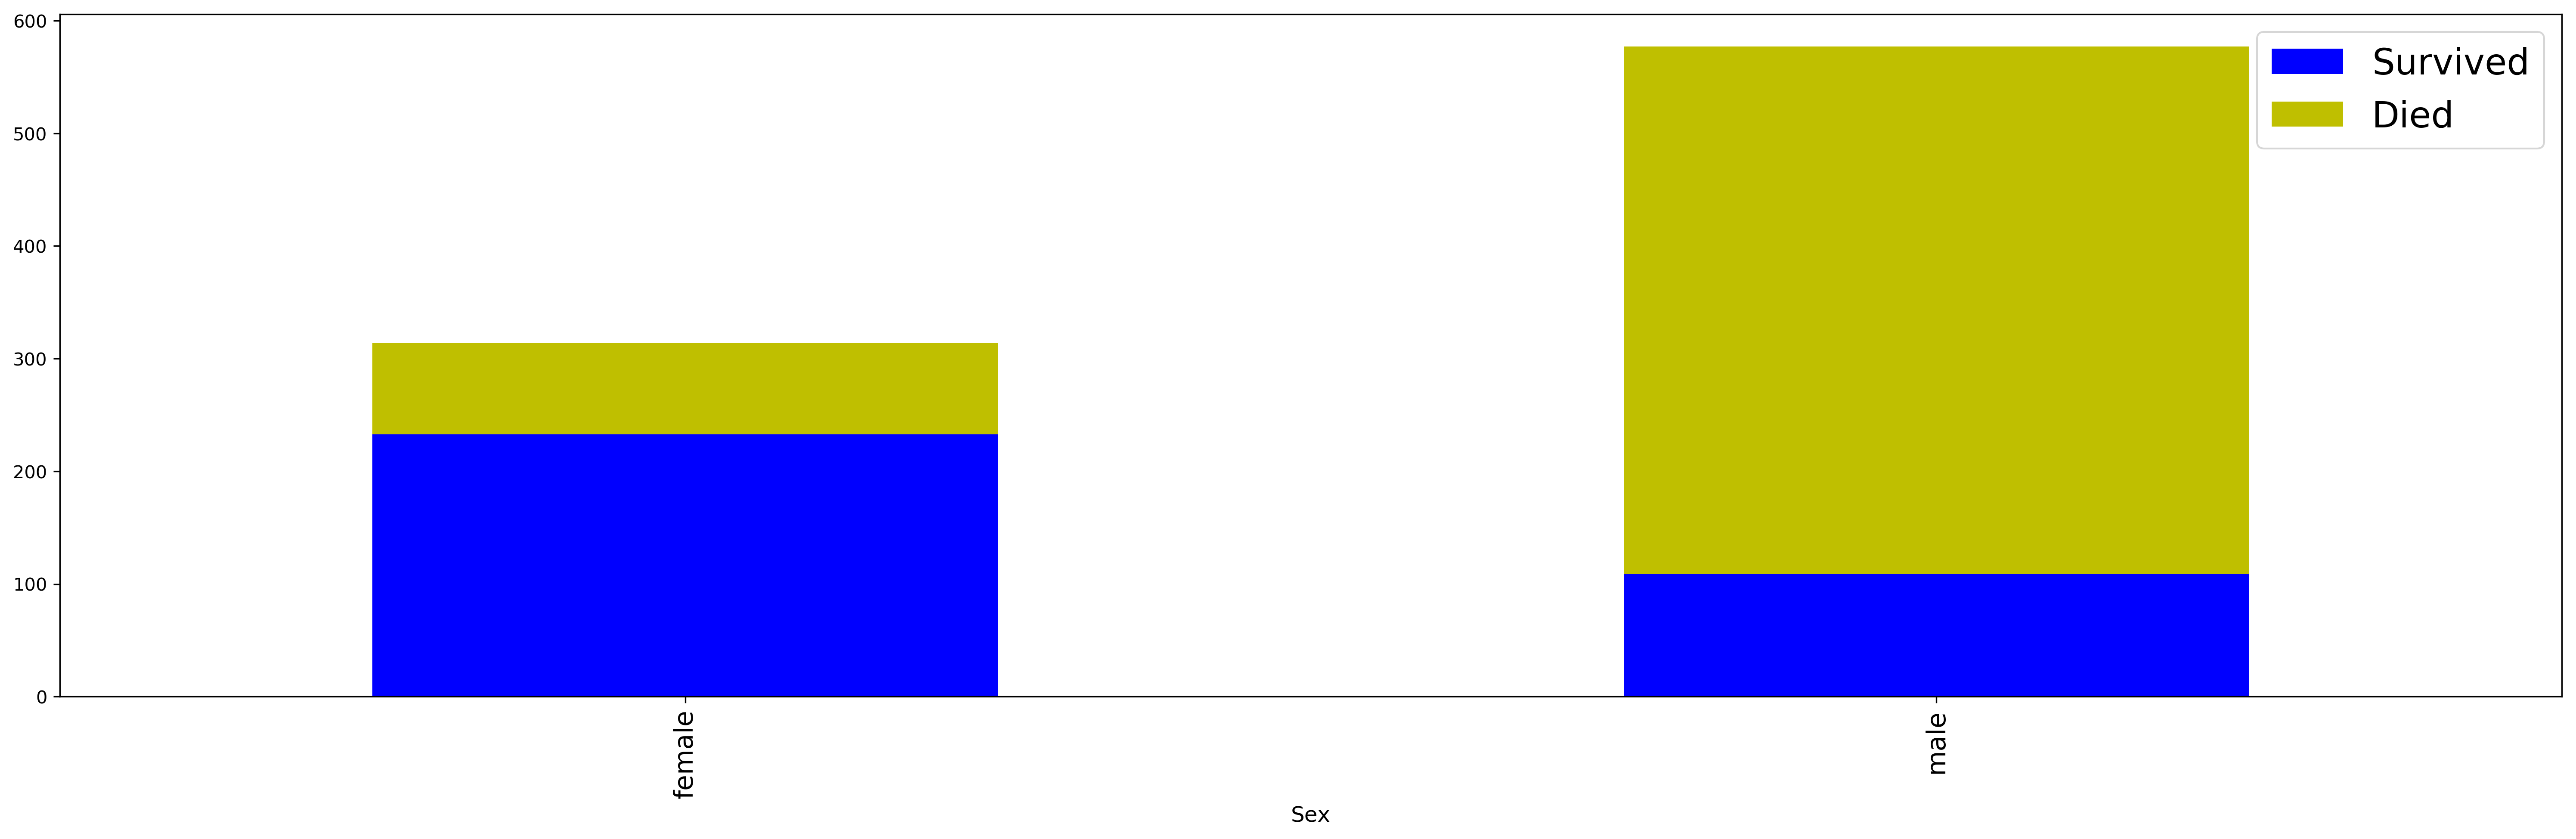

In [92]:
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True, colors=['b', 'y']);

Es mas probable que personas del genero masculino no sobrevivan

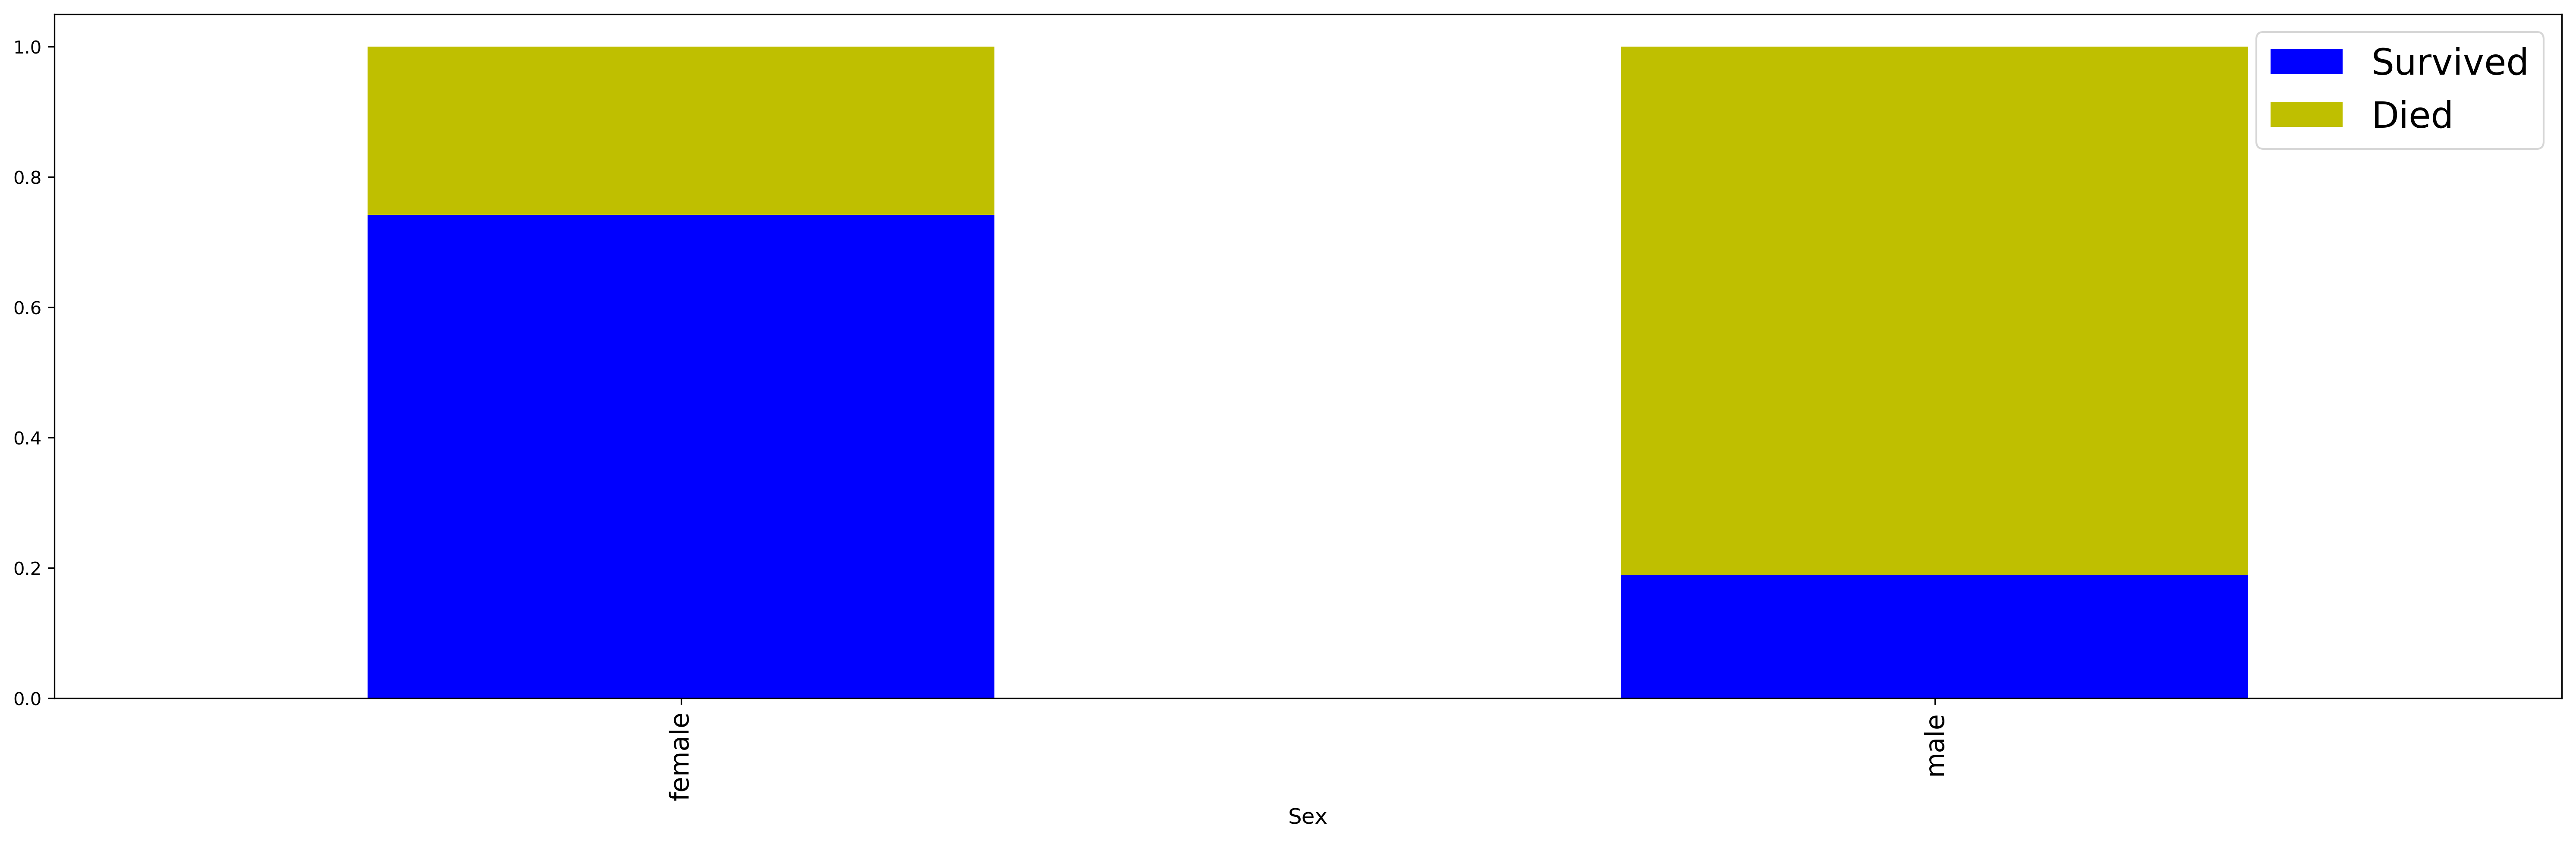

In [93]:
data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, colors=['b', 'y']);

La variables sexo es una variable discriminante, es mas probable que sobrevivan las personas de sexo femenino.

Let's now correlate the survival with the age variable.

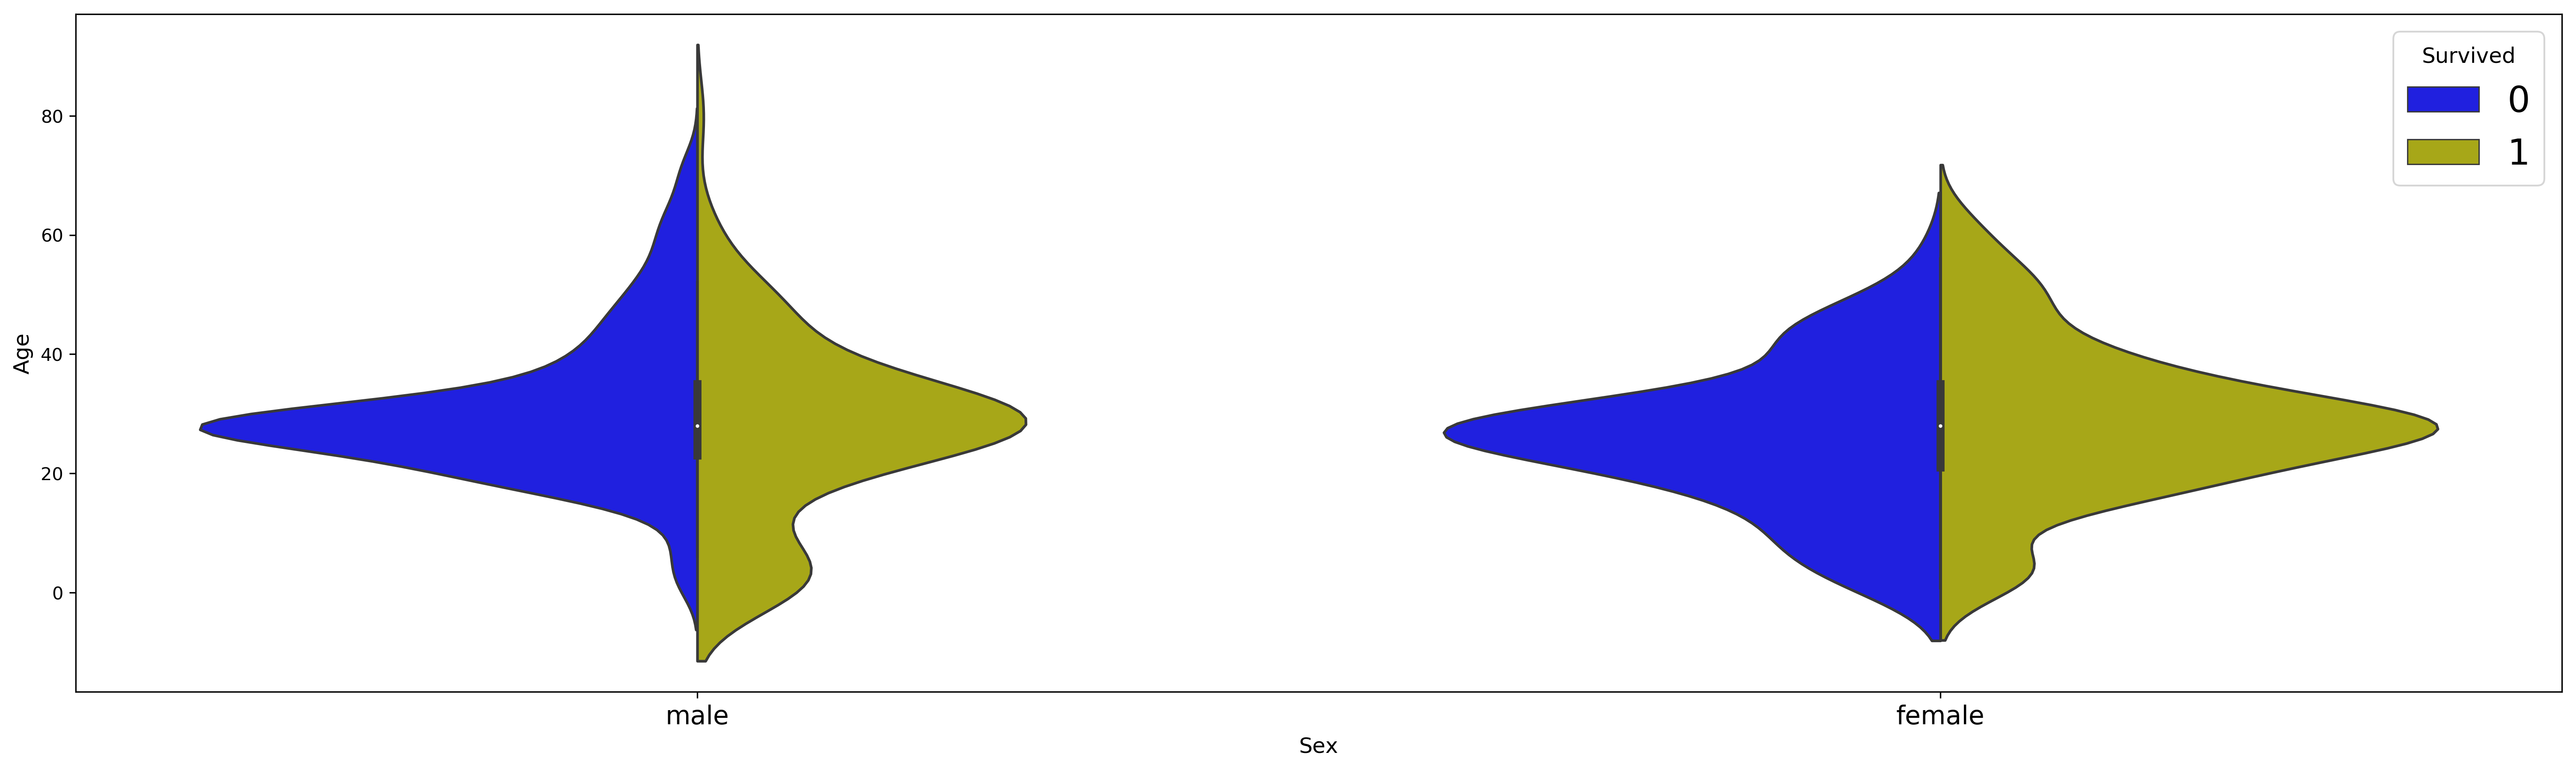

In [94]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=data, 
               split=True,
               palette={0: "b", 1: "y"}
              );

Observamos lo siguiente:

- Mujeres sobreviven mas que los hombres
- Mujeres jovenes y niñas tienden a sobrevivir


Let's now focus on the Fare ticket of each passenger and see how it could impact the survival. 

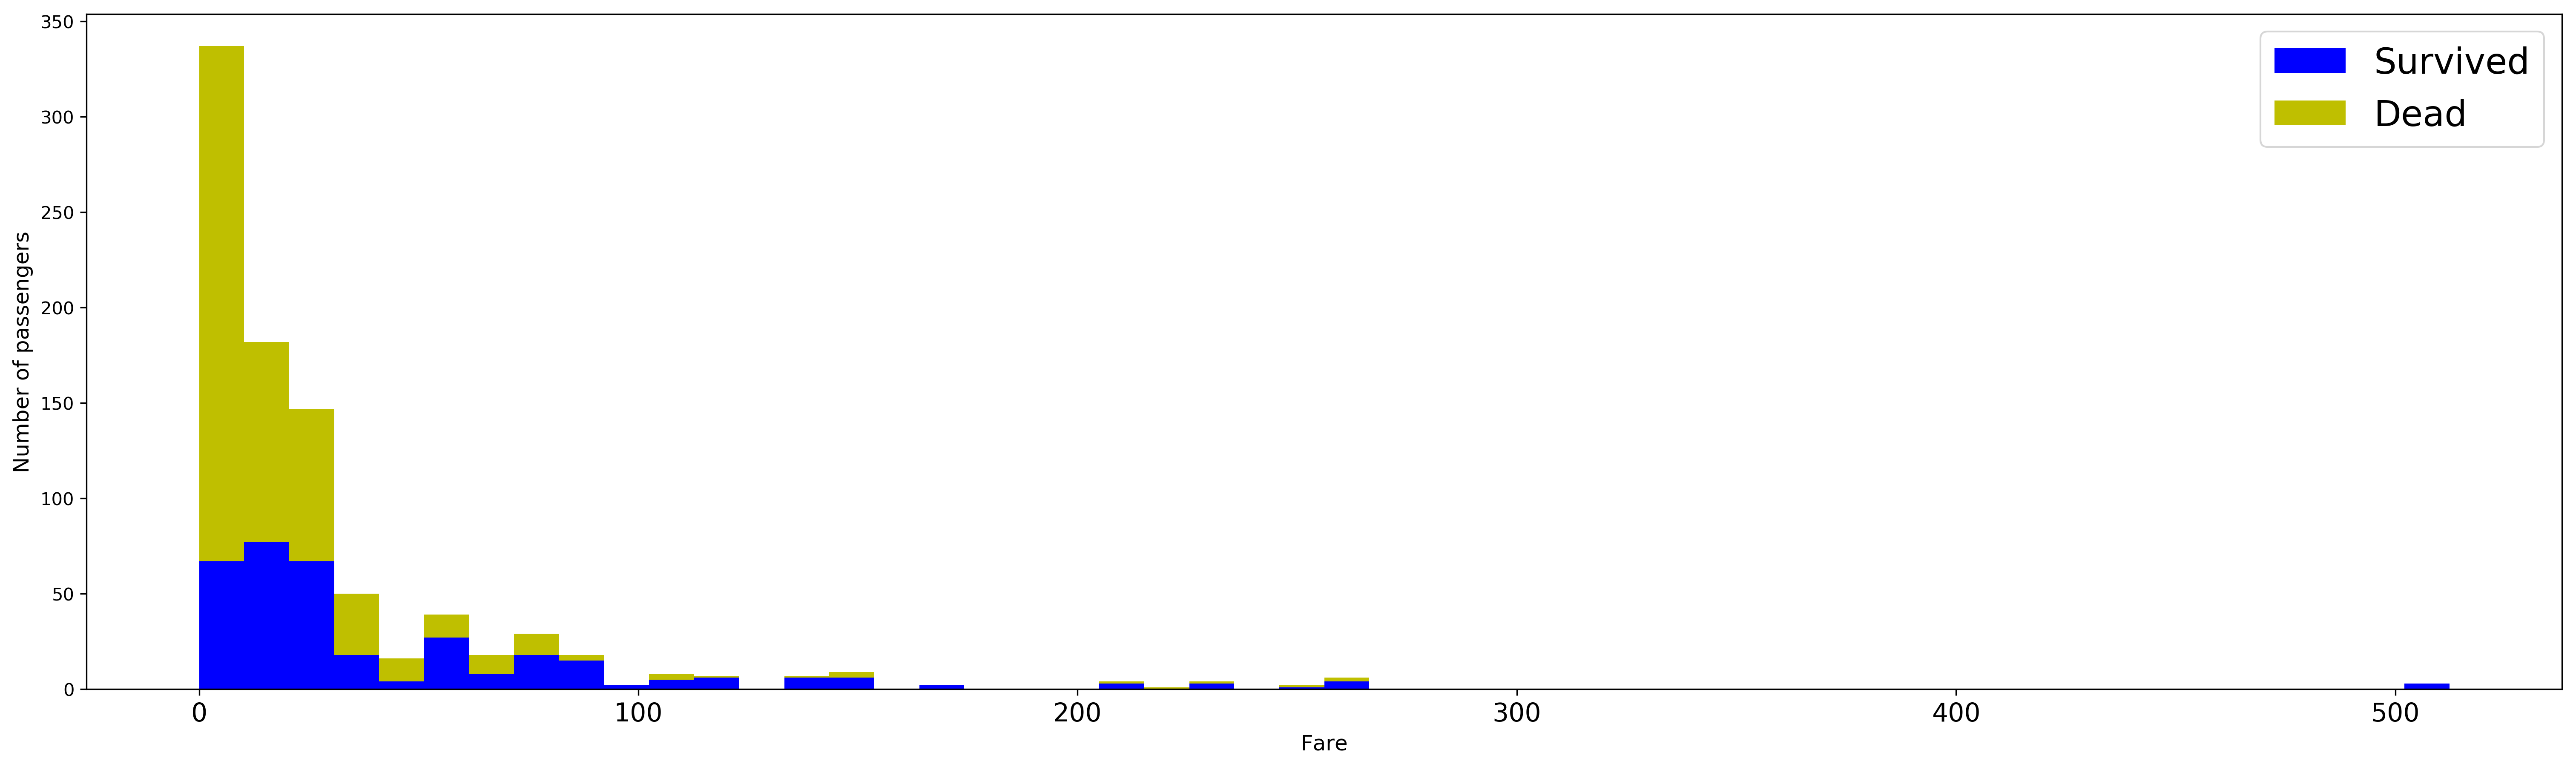

In [95]:
figure = plt.figure(figsize=(25, 7))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['b','y'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

Los pasajeros con boletos más baratos tienen más probabilidades de morir.
En otras palabras, los pasajeros con boletos más caros, y por lo tanto un estado social más importante, parecen ser rescatados primero.

Ahora combinamos la edad, la tarifa y la supervivencia en un solo cuadro

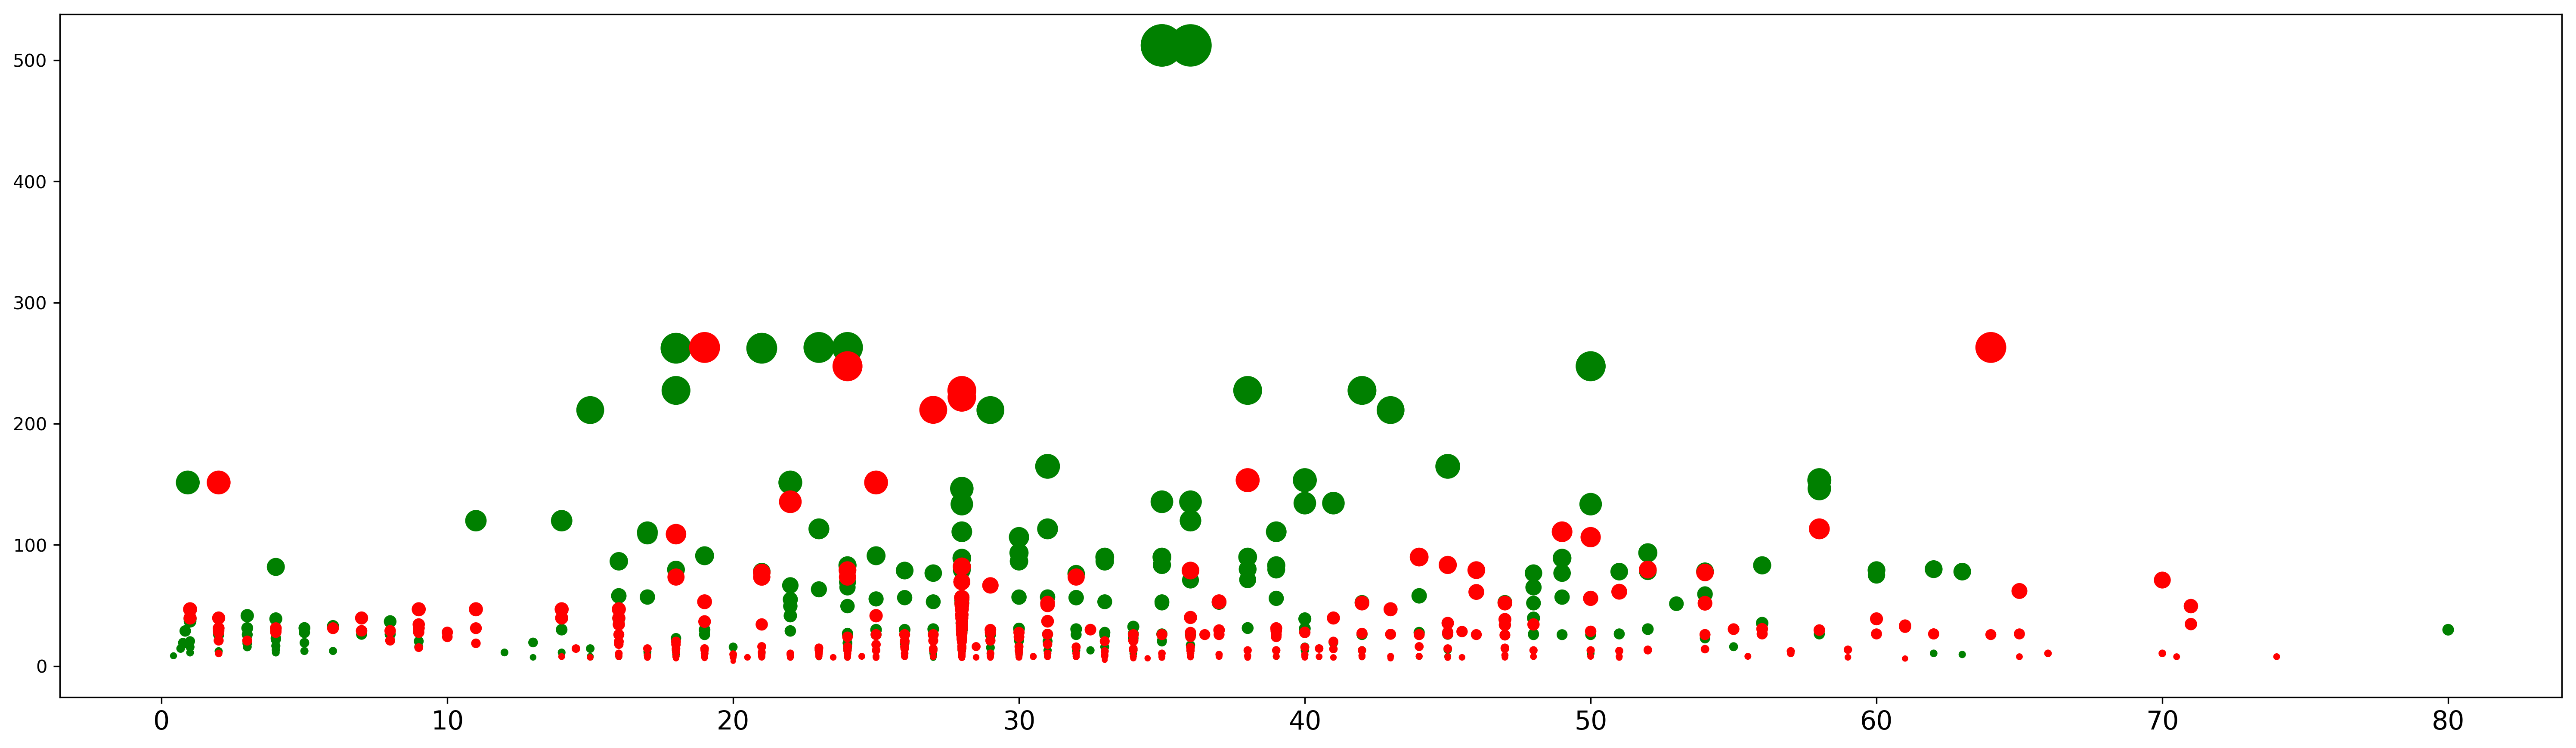

In [96]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='red', s=data[data['Survived'] == 0]['Fare']);

El tamaño de los círculos es proporcional a la tarifa del boleto.

En el eje x, tenemos las edades y el eje y, consideramos la tarifa del boleto.

Podemos observar diferentes clusters:

1. Puntos verdes grandes entre x = 20 y x = 45: adultos con las tarifas de boletos más grandes
2. Pequeños puntos rojos entre x = 10 y x = 45, adultos de clases bajas en el barco
3. Pequeños puntos rojos entre x = 0 y x = 7: estos son los niños que se salvaron

La tarifa del boleto se correlaciona con la clase como lo vemos en el cuadro a continuación. 

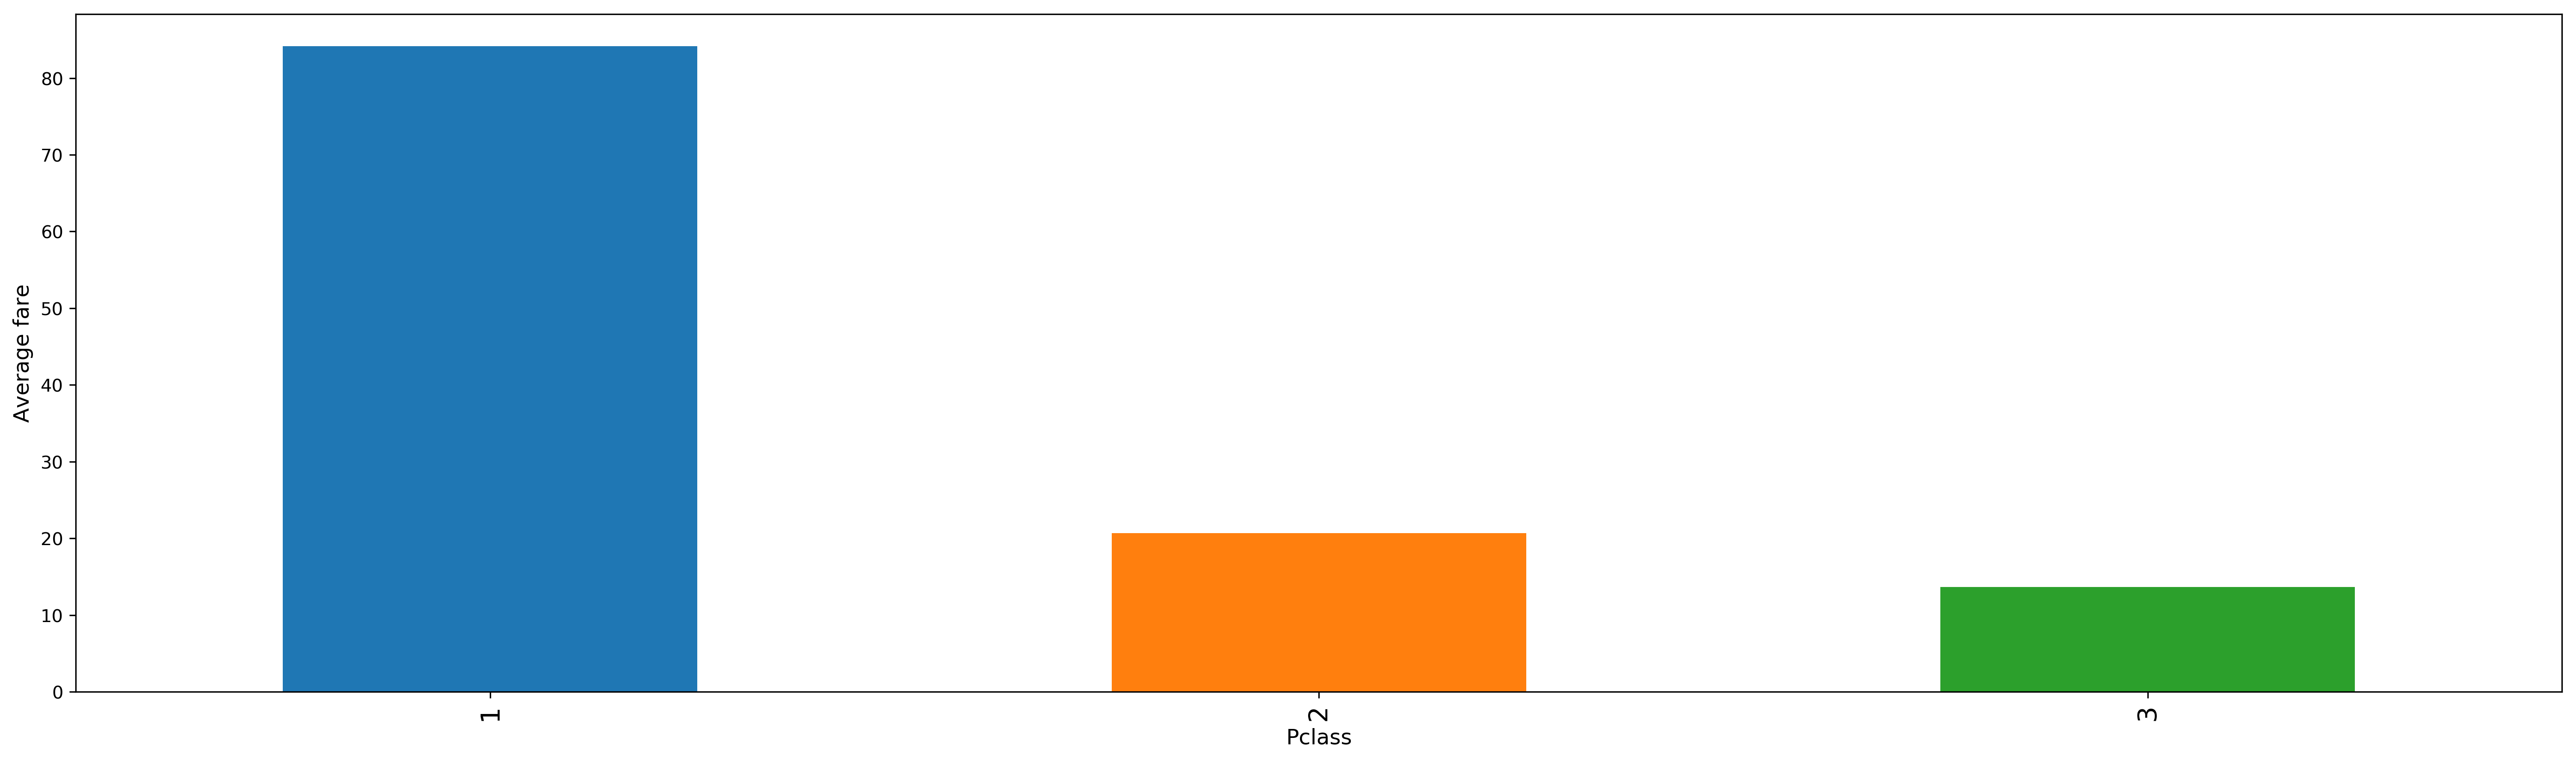

In [97]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25, 7), ax = ax);

Sitio de embarcacion y su efecto en la sobrevivencia

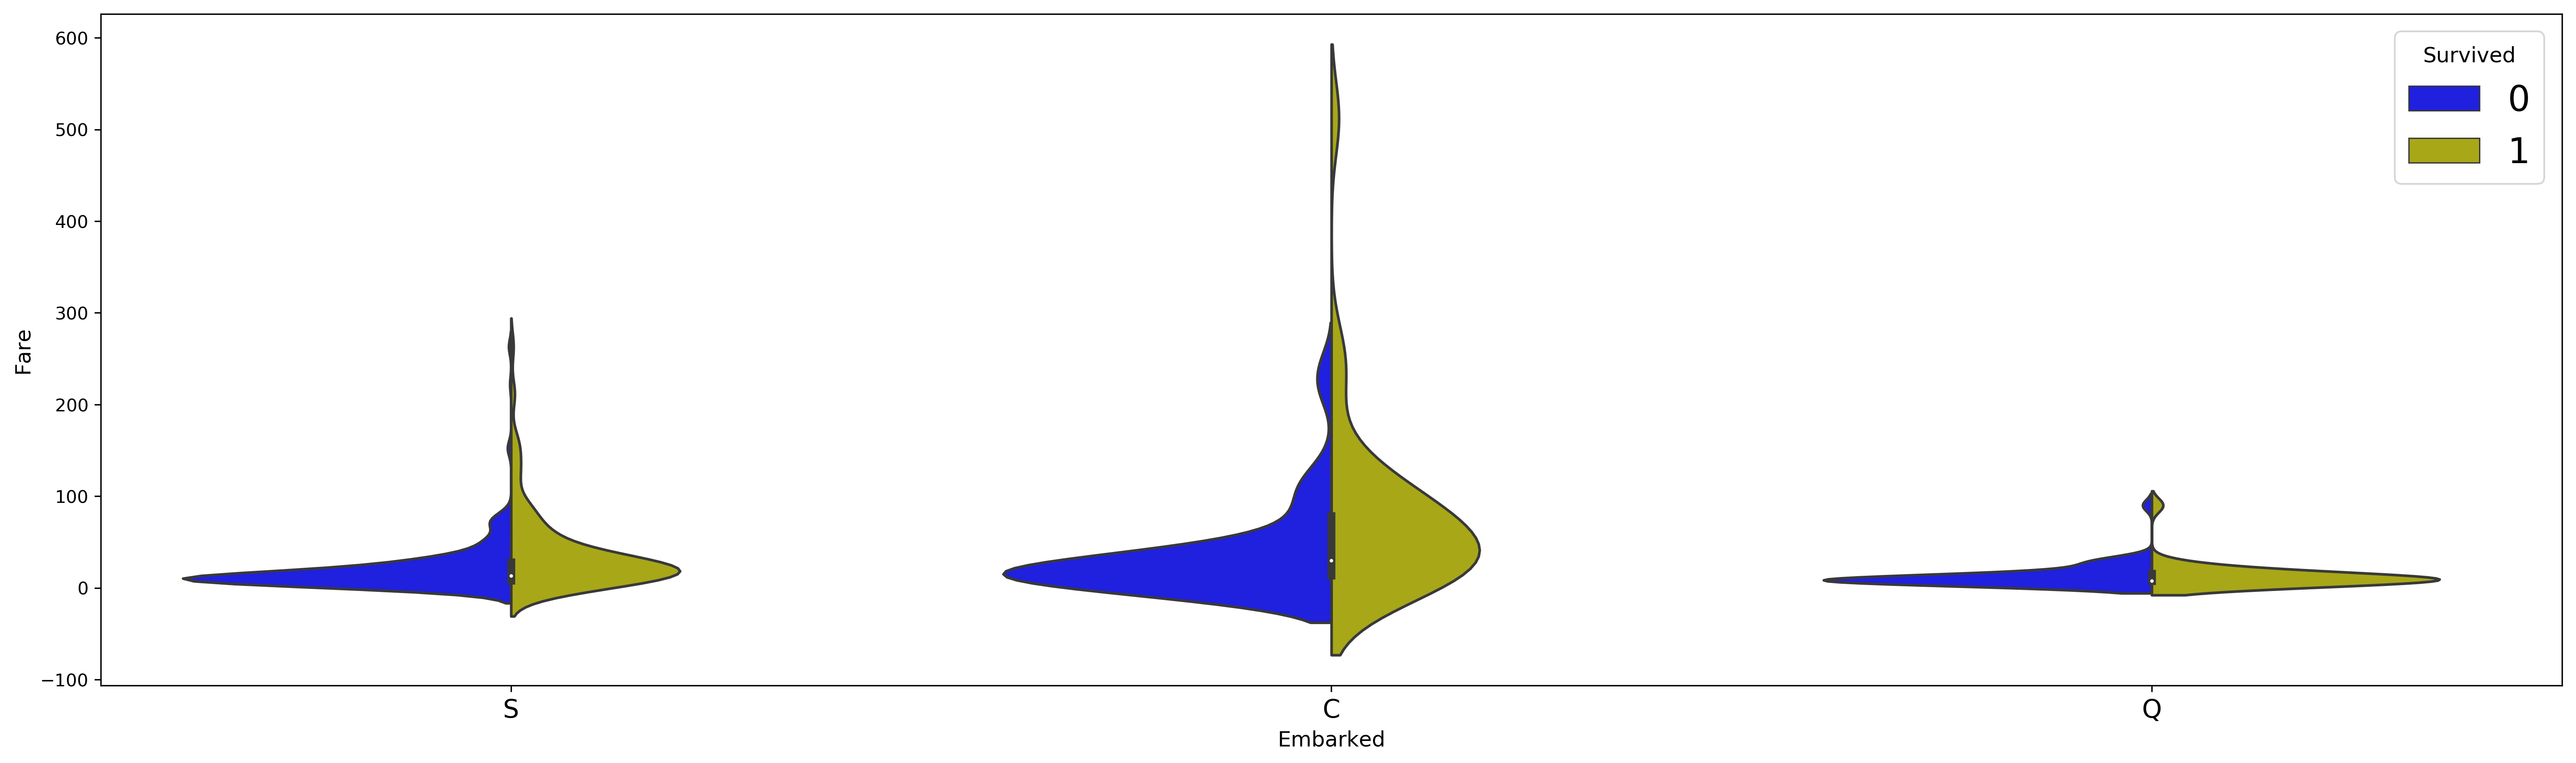

In [98]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: "b", 1: "y"});

Parece que el embarque C tiene una gama más amplia de pasajes de tarifas y, por lo tanto, los pasajeros que pagan los precios más altos son los que sobreviven.

También vemos que esto sucede en el embarque S y menos en el embarque Q.

Ahora detengámonos con la exploración de datos y pasemos a la siguiente parte.

<h2>2. Clasificacion con Machine Learning </h2>

<h3>A. Pre-procesamiento de variables</h3>

In [99]:
# Dividimos la matriz en X y Y.
Y = data["Survived"]
X = data.drop("Survived", axis = 1)
print(X.shape, Y.shape)

(891, 12) (891,)


<h3>B. Train, validation y test sets</h3>
<h3>EJERCICIO</h3>
<p>Debes escoger el porcentaje de datos que ocupara el training set y lo mismo para el validation set. Recuerda los valores que vimos en clase.</p>
<p><strong>Nota: </strong>En esta ocacion solo necesitamos un train set y un validation set. El test set lo provee Kaggle.</p>

In [104]:
# TRAIN SIZE Y VALIDATION SIZE deben sumar 1.0. 
# Por ejemplo: TRAIN_SIZE = 0.5 y VALIDATION_SIZE = 0.5
TRAIN_SIZE = 0.6 # ESCOJE EL VALOR DEL TRAINING SET
VALIDATION_SIZE = 0.4 # ESCOJE EL VALOR DEL VALIDATION SET
assert TRAIN_SIZE+VALIDATION_SIZE==1.0, "TRAIN SIZE y VALIDATION SIZE deben sumar 1.00"

In [105]:
# Training y validation set.
x_train, x_validation, y_train, y_validation = train_test_split(X, Y, test_size=TEST_SIZE, random_state=42)
print("Tamaños train set: ", x_train.shape, y_train.shape)
print("Tamaños validation set: ", x_validation.shape, y_validation.shape)

NameError: name 'TEST_SIZE' is not defined

<h3>C. Modelos para clasificación</h3>
<h3>Ejercicios</h3>
<p>Tu trabajo es entrenar los modelos de aprendizaje automatico evitando el overfitting y underfitting. Para lo cual analizaras la precision de tu modelo utilizando el train y el validation set. <strong>Recuerda que ambas precisiones deben estar lo mas cerca posible entre ellas para obtener un buen resultado.</strong></p>

<h3>Random forest</h3>
<p>Utiliza la documentacion en el siguiente link para tunear los parametros de un random forest: <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">Random forest</a></p>

In [106]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
randForClf = RandomForestClassifier(n_estimators = 25, # CAMBIA EL VALOR DE ESTE PARAMETRO
                             max_features = 6, # CAMBIA EL VALOR DE ESTE PARAMETRO
                             max_depth = 4, # CAMBIA EL VALOR DE ESTE PARAMETRO
                             min_samples_leaf = 10, # CAMBIA EL VALOR DE ESTE PARAMETRO
                             min_samples_split = 2) # CAMBIA EL VALOR DE ESTE PARAMETRO
randForClf.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [ ]:
print("Score en training set: ", randForClf.score(x_train, y_train))
print("Score en validation set: ", randForClf.score(x_validation, y_validation))

<h3>SVM</h3>
<p>Utiliza la documentacion en el siguiente link para tunear los parametros de un SVM: <a href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a></p>
<br>
<p>Puedes escoger entre los siguientes tipos de kernel: </p>
<ol>
    <li>"linear"</li>
    <li>"rbf"</li>
    <li>"sigmoid"</li>    
</ol>

In [ ]:
# SVM
from sklearn.svm import SVC
svcclf = SVC(kernel = "sigmoid") # ESCOJE EL TIPO DE KERNEL DE EN ESTE PARAMETRO
svcclf.fit(x_train, y_train)

In [ ]:
print("Score en training set: ", svcclf.score(x_train, y_train))
print("Score en validation set: ", svcclf.score(x_validation, y_validation))

<h3>Adaboost</h3>
<p>Utiliza la documentacion en el siguiente link para tunear los parametros de un Adaboost: <a href="http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_hastie_10_2.html#sphx-glr-auto-examples-ensemble-plot-adaboost-hastie-10-2-py">Adaboost</a></p>

In [ ]:
# Adaboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier
# Clasifier
treeclf = DecisionTreeClassifier(max_depth= , # ESCOJE EL MAX DEPTH
                                 min_samples_leaf= ) # ESCOJE EL MIN SAMPLES LEAF
treeclf.fit(x_train, y_train)
adareal = AdaBoostClassifier(
    base_estimator=treeclf,
    learning_rate = , # ESCOJE UNA TASA DE APRENDIZAJE
    n_estimators = , # ESCOJE UN NUMERO DE ESTIMADORES
    algorithm="SAMME.R")
adareal.fit(x_train, y_train)

In [ ]:
print("Score en training set: ", adareal.score(x_train, y_train))
print("Score en validation set: ", adareal.score(x_validation, y_validation))